New DG Food Agro are a multinational exporter of various grains from India since nearly 130 years. But their main product of exporting since early 1980s has been Wheat. They export wheat to countries like America, Afghanistan, Australia etc. They started seeing varying exports of sales year on year for various countries. The reason that was theorized by them had a lot of natural causes like floods, country growth, population explosion etc. Now they need to decide which countries fall in the same range of export and which don’t. They also need to know which countries export is low and can be improved and which countries are performing very well across the years.

The data provided right now is across 18 years. What they need is a repeatable solution which won’t get affected no matter how much data is added across time and that they should be able to explain the data across years in less number of variables.

**BUSINESS CHALLENGE/REQUIREMENT**

Our objective is to cluster the countries based on various sales data provided to us across years. We have to apply an unsupervised learning technique like K means or Hierarchical clustering so as to get the final solution. But before that we have to bring the exports (in tons) of all countries down to same scale across years. Plus, as this solution needs to be repeatable we will have to do PCA so as to get the principal components which explain max variance..

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import datetime as dt #work with date type
from scipy import stats #Stats frameworks

#Visualisation frameworks
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns

from sklearn.model_selection import train_test_split # Split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

**1) Read the data fileand check for any missing values**

In [2]:
#Loading our df
df = pd.read_csv('C:/Users/gabri/Desktop/Data Science/Python/Python for Data Science - Edureka/Certification Project/Project_Data_1.csv')

#Printing first five rows and shape
print(df.shape)
df.head()

(207, 19)


,Sales of Wheat in tons,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
1,Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
2,Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
3,American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
4,Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19


In [3]:
df.isna().sum()

Sales of Wheat in tons    0
1990                      0
1991                      0
1992                      0
1993                      0
1994                      0
1995                      0
1996                      0
1997                      0
1998                      0
1999                      0
2000                      0
2001                      0
2002                      0
2003                      0
2004                      0
2005                      0
2006                      0
2007                      0
dtype: int64

**2) Change the headers to country and year accordingly.**

In [4]:
df = df.rename(columns={'Sales of Wheat in tons': 'Country'})
df.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
1,Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
2,Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
3,American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
4,Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19


**3) Cleanse the data if required and remove null or blank values**

In [5]:
df_model = df.set_index('Country')
df_model.columns.names = ['year']
df_model.head()

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
Country,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19


In [6]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207 entries, Afghanistan to Zimbabwe
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1990    207 non-null    object
 1   1991    207 non-null    object
 2   1992    207 non-null    object
 3   1993    207 non-null    object
 4   1994    207 non-null    object
 5   1995    207 non-null    object
 6   1996    207 non-null    int64 
 7   1997    207 non-null    int64 
 8   1998    207 non-null    int64 
 9   1999    207 non-null    int64 
 10  2000    207 non-null    int64 
 11  2001    207 non-null    int64 
 12  2002    207 non-null    int64 
 13  2003    207 non-null    int64 
 14  2004    207 non-null    object
 15  2005    207 non-null    object
 16  2006    207 non-null    object
 17  2007    207 non-null    object
dtypes: int64(8), object(10)
memory usage: 30.7+ KB


It seems that we're facing issues with some columns because floats are using commas instead of dots. Let's replace all commas with dots in our df.

In [8]:
#List of columns that are object
column_list = list(df_model.select_dtypes(['object']).columns)

for i in column_list:
    #Replacing ',' with '.'
    df_model[i] = df_model[i].str.replace(',', '.')
    #Changing dtype to numeric
    df_model[i] = pd.to_numeric(df_model[i])
    
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207 entries, Afghanistan to Zimbabwe
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1990    207 non-null    float64
 1   1991    207 non-null    float64
 2   1992    207 non-null    float64
 3   1993    207 non-null    float64
 4   1994    207 non-null    float64
 5   1995    207 non-null    float64
 6   1996    207 non-null    int64  
 7   1997    207 non-null    int64  
 8   1998    207 non-null    int64  
 9   1999    207 non-null    int64  
 10  2000    207 non-null    int64  
 11  2001    207 non-null    int64  
 12  2002    207 non-null    int64  
 13  2003    207 non-null    int64  
 14  2004    207 non-null    float64
 15  2005    207 non-null    float64
 16  2006    207 non-null    float64
 17  2007    207 non-null    float64
dtypes: float64(10), int64(8)
memory usage: 30.7+ KB


**4) After the EDA part is done, try to think which algorithm should be applied here.**

We can use cluster techniques after PCA based on saled per year for each country.

**5) As we need to make this across years we need to apply PCA first.**

**6) Apply PCA on the dataset and find the number of principal components which explain nearly all the variance.**

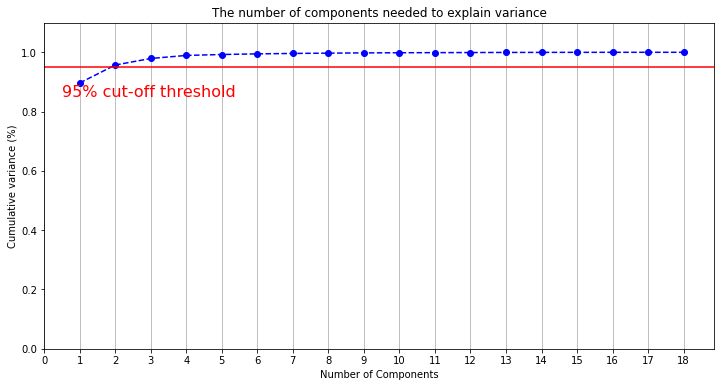

In [9]:
#Credit: https://www.kaggle.com/kushal1506/deciding-n-components-in-pca

pca = PCA().fit(df_model)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 19, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 19, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

We can see that n_components = 2 is enought to cut-off threshold.

In [10]:
#PCA and fitting
pca = PCA(n_components=2, random_state=0).fit(df_model)

#Transforming our df_model into an array
df_2d = pca.transform(df_model)

#Transforming array back to dataframe
df_2d = pd.DataFrame(df_2d)
df_2d.index = df_model.index
df_2d.columns = ['PC1','PC2']
df_2d.head()

,PC1,PC2
Country,,
Afghanistan,744.815213,-235.636419
Albania,-595.865592,6.105249
Algeria,-551.303760,45.952015
American Samoa,-700.700584,8.865202
Andorra,-645.423819,1.536970


**7) Plot elbow chart or scree plot to find out optimal number of clusters.**

C:\Users\gabri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


[143174661.42913204, 32928511.20334169, 20558307.942913406, 15388600.284071721, 10769976.809243042, 9037413.829789007, 7325366.0431221565, 6205898.3737080665, 5452235.475424932, 4729827.204549045]


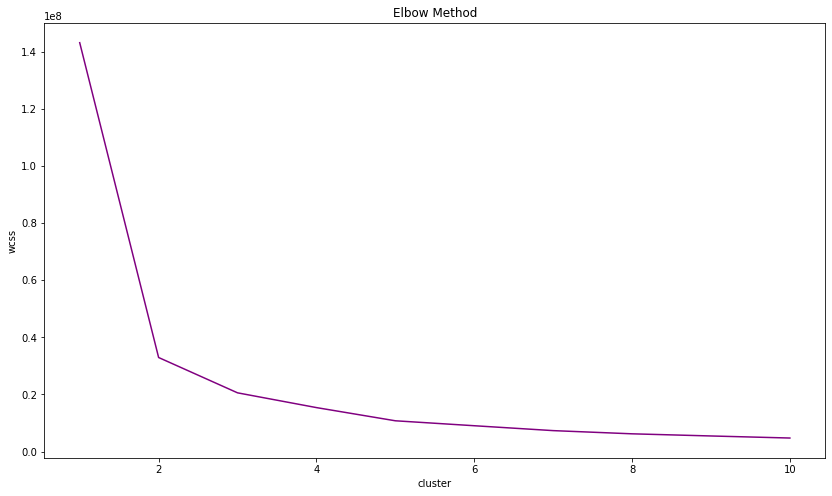

In [11]:
# elbow method
wcss = []
for i in range(1,11):                                 
    kmeans = KMeans(n_clusters=i, init = "k-means++") 
    kmeans.fit(df_2d)
    wcss.append(kmeans.inertia_)
print (wcss)   

plt.figure(figsize=(14,8))
plt.plot(range(1,11),wcss, c='purple')
plt.xlabel("cluster")
plt.ylabel("wcss")
plt.title('Elbow Method')
plt.show()

**8) Try to apply K means, Hierarchicalclustering and showcase the results.**

**9)You can either choose to group the countries based on years of data or using the principal components.**

**K-Means**

C:\Users\gabri\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='cluster', ylabel='count'>

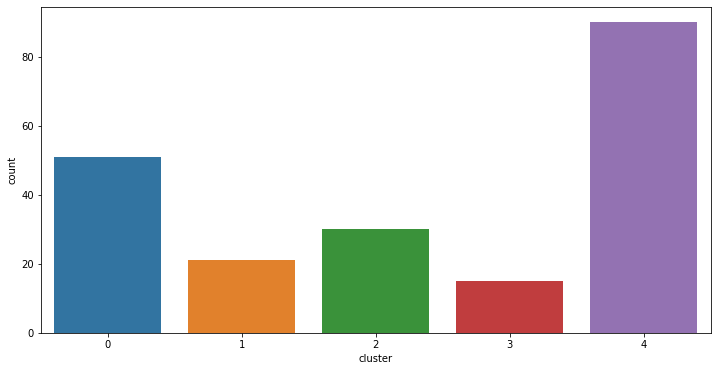

In [23]:
#Best number of clusters
k = 5

kmeans = KMeans(n_clusters=k, random_state=0) #Creating model Kmeans
clusters = kmeans.fit(df_2d) #Fitting
df_2d['cluster'] = pd.Series(clusters.labels_, index=df_2d.index) #Creating new column for clusters

#Plotting
sns.countplot(df_2d['cluster'])

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

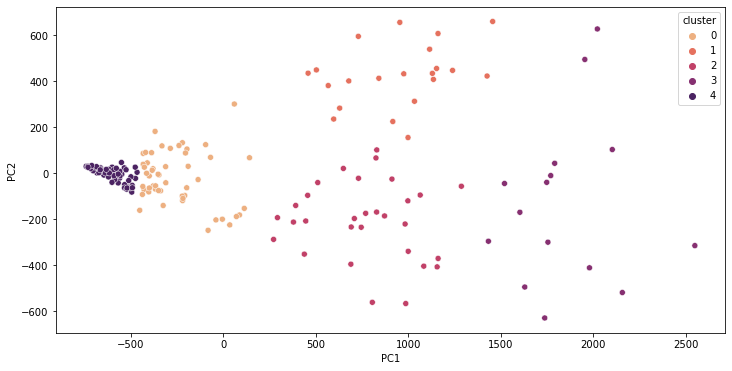

In [52]:
sns.scatterplot(x='PC1', y='PC2',data=df_2d, hue='cluster', palette='flare')

**Hierarchical clustering**

C:\Users\gabri\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='cluster_Hie', ylabel='count'>

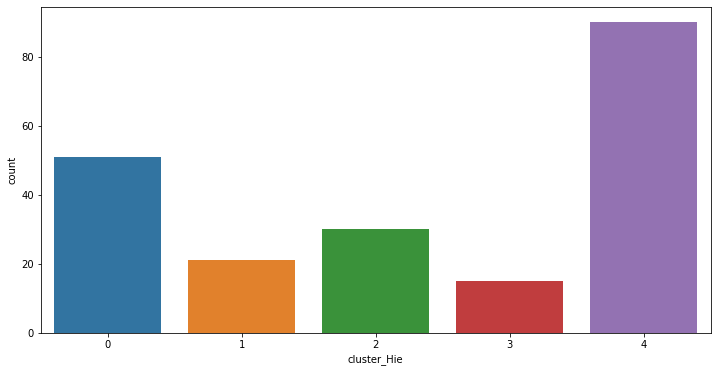

In [37]:
from sklearn.cluster import AgglomerativeClustering

cluster2 = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
cluster2 = cluster2.fit(df_2d)

df_2d['cluster_Hie'] = pd.Series(clusters.labels_, index=df_2d.index) #Creating new column for clusters

#Plotting
sns.countplot(df_2d['cluster_Hie'])

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

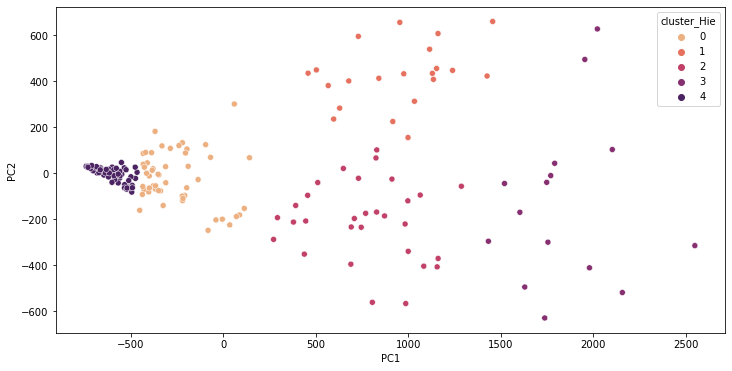

In [50]:
sns.scatterplot(x='PC1', y='PC2',data=df_2d, hue='cluster_Hie', palette='flare')

**10)Then see which countries are consistent and which are largest importers of the good based on scale and position of cluster.**

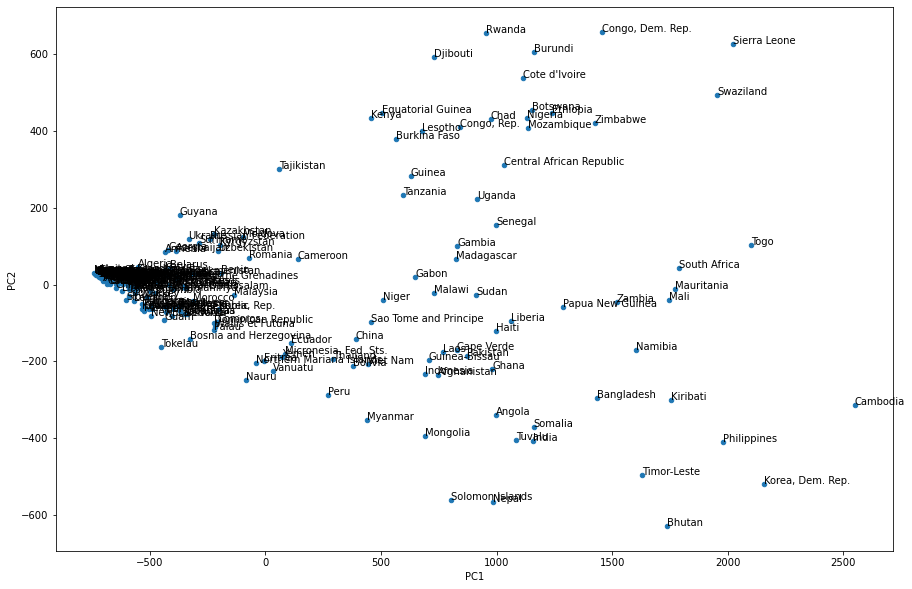

In [51]:
ax = df_2d.plot(figsize=(15,10), kind='scatter', x='PC1', y='PC2')

for row, country in enumerate(df_2d.index):
    ax.annotate(country, (df_2d.iloc[row]['PC1'], df_2d.iloc[row]['PC2']))